In [1]:
#list of libraries used 
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import csv
#My laptop can only take Miniconda & below codes are used for importing the table that cannot be easily accessed with simple pd.read_csv
try:
    df = pd.read_csv(
        'amz_uk_price_prediction_dataset.csv',
        quoting=csv.QUOTE_NONE,
        on_bad_lines='skip',
        engine='c',
  
        low_memory=False
    )
    print("--- File load attempt complete ---")
    print(f"File loaded successfully with {len(df)} rows.")
    print("\nFirst 5 rows:")
    print(df.head())

except Exception as e:
    print(f"An error occurred: {e}")

--- File load attempt complete ---
File loaded successfully with 1731819 rows.

First 5 rows:
            "uid"                                             "asin"  \
"1"  "B09B96TG33"                          "Echo Dot (5th generation   
"3"  "B09B8YWXDF"                          "Echo Dot (5th generation   
"4"  "B09B8T5VGV"               "Echo Dot with clock (5th generation   
"5"  "B09WX6QD65"  "Introducing Echo Pop | Full sound compact Wi-...   
"6"  "B09B97WSLF"               "Echo Dot with clock (5th generation   

                                               "title" "stars" "reviews"  \
"1"   2022 release) | Big vibrant sound Wi-Fi and B...   "4.7"   "15308"   
"3"   2022 release) | Big vibrant sound Wi-Fi and B...   "4.7"   "15308"   
"4"   2022 release) | Bigger vibrant sound Wi-Fi an...   "4.7"    "7205"   
"5"                                              "4.6"  "1881"   "17.99"   
"6"   2022 release) | Bigger vibrant sound Wi-Fi an...   "4.7"    "7205"   

     "price" "is

In [2]:
df.rename(columns={'"category"': 'Category', '"uid"': 'UID', '"asin"': 'Asin', '"title"':'Title', '"stars"':'Stars', '"reviews"':'Reviews', '"price"':'Price',
       '"isBestSeller"':'Best_Seller', '"boughtInLastMonth"':'BoughtInLastMonth', '"category"':'Category'}, inplace=True)
df

,UID,Asin,Title,Stars,Reviews,Price,Best_Seller,BoughtInLastMonth,Category
"""1""","""B09B96TG33""","""Echo Dot (5th generation",2022 release) | Big vibrant sound Wi-Fi and B...,"""4.7""","""15308""","""21.99""","""False""","""0""","""Hi-Fi Speakers"""
"""3""","""B09B8YWXDF""","""Echo Dot (5th generation",2022 release) | Big vibrant sound Wi-Fi and B...,"""4.7""","""15308""","""21.99""","""False""","""0""","""Hi-Fi Speakers"""
"""4""","""B09B8T5VGV""","""Echo Dot with clock (5th generation",2022 release) | Bigger vibrant sound Wi-Fi an...,"""4.7""","""7205""","""31.99""","""False""","""0""","""Hi-Fi Speakers"""
"""5""","""B09WX6QD65""","""Introducing Echo Pop | Full sound compact Wi-...","""4.6""","""1881""","""17.99""","""False""","""0""","""Hi-Fi Speakers""",NaN
"""6""","""B09B97WSLF""","""Echo Dot with clock (5th generation",2022 release) | Bigger vibrant sound Wi-Fi an...,"""4.7""","""7205""","""31.99""","""False""","""0""","""Hi-Fi Speakers"""
...,...,...,...,...,...,...,...,...,...
"""2828588""","""B0BQMXJPP5""","""Helmet Ponytail Pigtails Twist Braids Hair wi...","""0.0""","""0""","""19.99""","""False""","""0""","""Motorbike Clothing""",NaN
"""2828590""","""B0B7B8FNBQ""","""PROFIRST Waterproof Motorcycle 2 Piece Ladies...",Trouser with Minder Boots for women ladies Su...,"""0.0""","""0""","""97.99""","""False""","""0""","""Motorbike Clothing"""
"""2828591""","""B0BD5FL5FB""","""Men’s Motorcycle Motorbike Biker Trousers Kev...","""0.0""","""0""","""52.99""","""False""","""0""","""Motorbike Clothing""",NaN
"""2828592""","""B008OYLL4I""","""Texpeed Mens Motorcycle Motorbike Biker Trous...","""4.3""","""404""","""79.99""","""False""","""0""","""Motorbike Clothing""",NaN


In [3]:
#Since I cannot use CSV conversions like others do, I have to clean the columns first to work on this lab 
# 1. Define the columns you want to clean
cols_to_fix = ['Price', 'Stars'] 

for col in cols_to_fix:
    # Convert to string and strip/replace quotes
    df[col] = df[col].astype(str).str.strip().str.replace('"', '', regex=False)
    
    # Clean up 'False' and 'nan' strings
    df[col] = df[col].str.replace('False', '0', regex=False).str.replace('nan', '0', regex=False)
    
    # Convert to numeric (non-numeric become NaN)
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Fill remaining NaNs with 0
    df[col] = df[col].fillna(0)

import numpy as np

# 1. Strip quotes and normalize text, but keep actual NaN objects as NaN
df['Best_Seller'] = df['Best_Seller'].astype(str).str.replace('"', '', regex=False).str.strip().str.lower()

# 2. Define the logic: 0/false -> False, others -> True, but skip 'nan' strings
def clean_keep_nulls(val):
    if val in ['nan', 'none', 'null', '']: 
        return np.nan  # Keep it as a null value
    if val in ['0', '0.0', 'false']:
        return False
    return True

df['Best_Seller'] = df['Best_Seller'].apply(clean_keep_nulls)
df

,UID,Asin,Title,Stars,Reviews,Price,Best_Seller,BoughtInLastMonth,Category
"""1""","""B09B96TG33""","""Echo Dot (5th generation",2022 release) | Big vibrant sound Wi-Fi and B...,4.7,"""15308""",21.99,False,"""0""","""Hi-Fi Speakers"""
"""3""","""B09B8YWXDF""","""Echo Dot (5th generation",2022 release) | Big vibrant sound Wi-Fi and B...,4.7,"""15308""",21.99,False,"""0""","""Hi-Fi Speakers"""
"""4""","""B09B8T5VGV""","""Echo Dot with clock (5th generation",2022 release) | Bigger vibrant sound Wi-Fi an...,4.7,"""7205""",31.99,False,"""0""","""Hi-Fi Speakers"""
"""5""","""B09WX6QD65""","""Introducing Echo Pop | Full sound compact Wi-...","""4.6""",1881.0,"""17.99""",0.00,False,"""Hi-Fi Speakers""",NaN
"""6""","""B09B97WSLF""","""Echo Dot with clock (5th generation",2022 release) | Bigger vibrant sound Wi-Fi an...,4.7,"""7205""",31.99,False,"""0""","""Hi-Fi Speakers"""
...,...,...,...,...,...,...,...,...,...
"""2828588""","""B0BQMXJPP5""","""Helmet Ponytail Pigtails Twist Braids Hair wi...","""0.0""",0.0,"""19.99""",0.00,False,"""Motorbike Clothing""",NaN
"""2828590""","""B0B7B8FNBQ""","""PROFIRST Waterproof Motorcycle 2 Piece Ladies...",Trouser with Minder Boots for women ladies Su...,0.0,"""0""",97.99,False,"""0""","""Motorbike Clothing"""
"""2828591""","""B0BD5FL5FB""","""Men’s Motorcycle Motorbike Biker Trousers Kev...","""0.0""",0.0,"""52.99""",0.00,False,"""Motorbike Clothing""",NaN
"""2828592""","""B008OYLL4I""","""Texpeed Mens Motorcycle Motorbike Biker Trous...","""4.3""",404.0,"""79.99""",0.00,False,"""Motorbike Clothing""",NaN


In [4]:
### Part 1: Analyzing Best-Seller Trends Across Product Categories

#**Objective**: Understand the relationship between product categories 
#and their best-seller status.

#1.1 **Crosstab Analysis**:
# Create a crosstab between the product `category` and the `isBestSeller` status.  
#Are there categories where being a best-seller is more prevalent? 
#More consumption products such as filters & cartridges, pencils&wiriting supploes, Tea & expresso, Wine & spirit 
crosstab_result = pd.crosstab(df['Category'], df['Best_Seller'])
crosstab_result
crosstab_result['Proportion'] = crosstab_result[True] / (crosstab_result[True] + crosstab_result[False])
sorted_result = crosstab_result.sort_values(by='Proportion', ascending=False)
print(sorted_result[['Proportion']].head(10))
#(*Hint: one option is to calculate the proportion of best-sellers for each category 
#and then sort the categories based on this proportion in descending order.*)

Best_Seller                  Proportion
Category                               
Filters & Cartridges"          0.426230
Pencils & Writing Supplies"    0.297513
Tea & Espresso"                0.136177
Wine & Spirits"                0.131138
Cooling & Air Quality"         0.124640
Pillows & Accessories"         0.105263
TV & Video"                    0.092968
Seeds & Bulbs"                 0.090648
Tools & Wall Treatments"       0.077616
Snooker & Pool"                0.074468


In [5]:
#1.2. **Statistical Tests**:
#Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
from scipy.stats import chi2_contingency

# Chi-square test for 'Category' & 'Best_Seller' => the correlation is significant, p-value less than 0.05 
chi2_statistic, chi2_p_value, _, _= chi2_contingency(crosstab_result)

#Compute Cramér's V to understand the strength of association between best-seller status and category.
from scipy.stats.contingency import association
#association(crosstab_result, method="cramer")

# Using .loc specifically tells pandas to look for labels (columns)
# Take all rows (:) and only the first two columns (0:2)
counts_only = crosstab_result.iloc[:, 0:2]
val_cramer = association(counts_only, method="cramer")
val_cramer, chi2_statistic, chi2_p_value

(0.3391423006108259, np.float64(54791.600039023346), np.float64(0.0))

<crosstab original attempt> 
totals = crosstab_result.sum(axis=1)


threshold = 10
mask = totals < threshold


crosstab_cleaned = crosstab_result[~mask].copy()
crosstab_cleaned.loc['Other'] = crosstab_result[mask].sum()

crosstab_cleaned.plot(kind="bar", stacked=True)

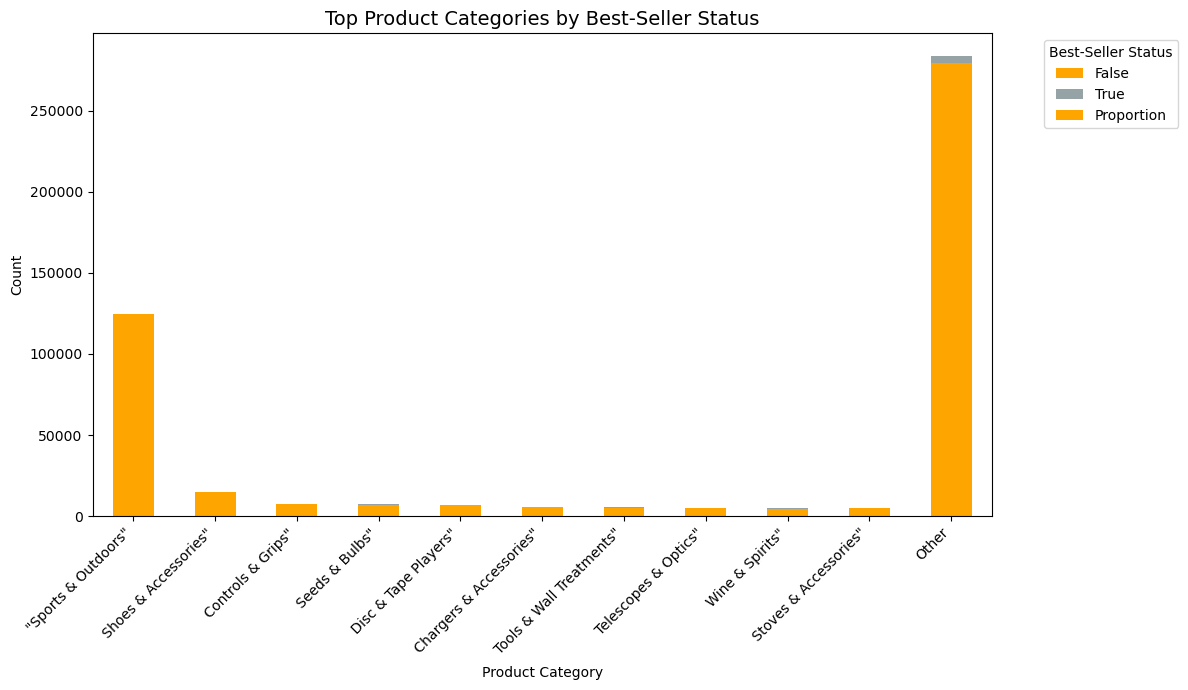

In [8]:
#1.3. **Visualizations**:
#Visualize the relationship between product categories and the best-seller status using a stacked bar chart.
#Top 10 Best Seller Status list

totals = crosstab_result.sum(axis=1).sort_values(ascending=False)

top_n = 10
top_labels = totals.head(top_n).index

crosstab_top = crosstab_result.loc[top_labels].copy()
crosstab_other = crosstab_result.loc[~crosstab_result.index.isin(top_labels)].sum()

crosstab_top.loc['Other'] = crosstab_other

ax = crosstab_top.plot(kind="bar", 
                       stacked=True, 
                       figsize=(12, 7), 
                       color=['#ffA500', '#95a3a6']) 

plt.title('Top Product Categories by Best-Seller Status', fontsize=14)
plt.ylabel('Count')
plt.xlabel('Product Category')

plt.xticks(rotation=45, ha='right')

plt.legend(title='Best-Seller Status', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribution of product ratings')

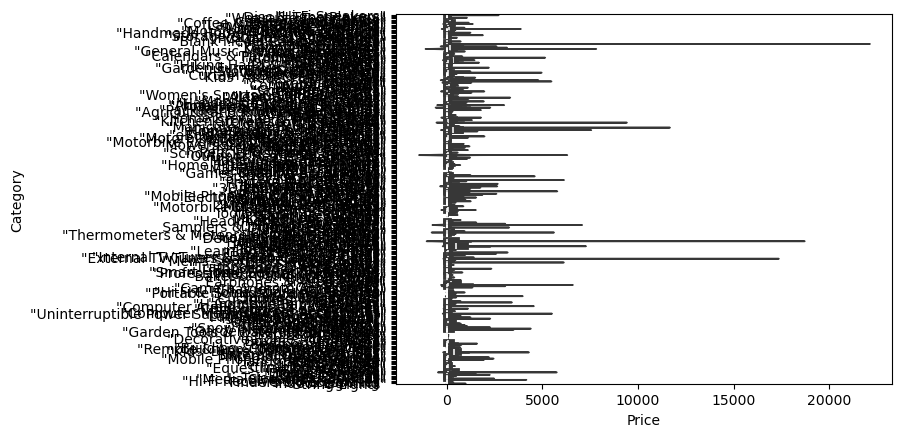

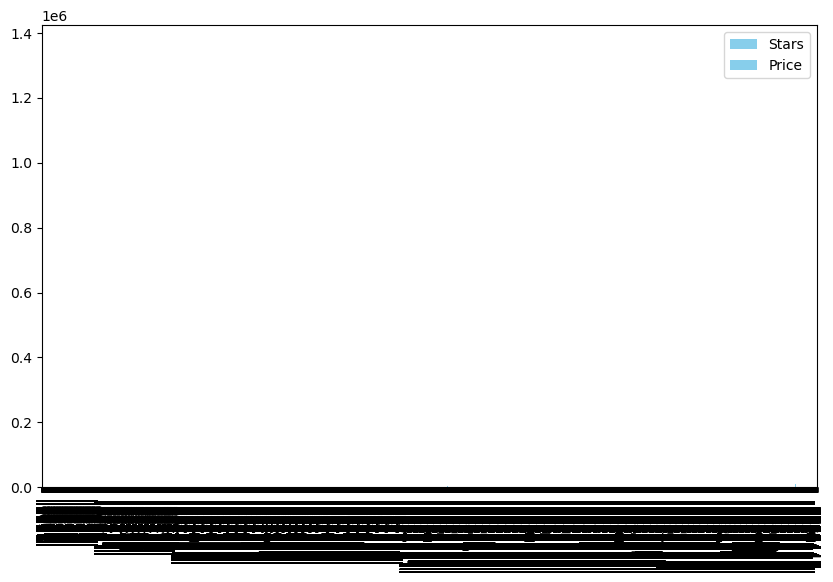

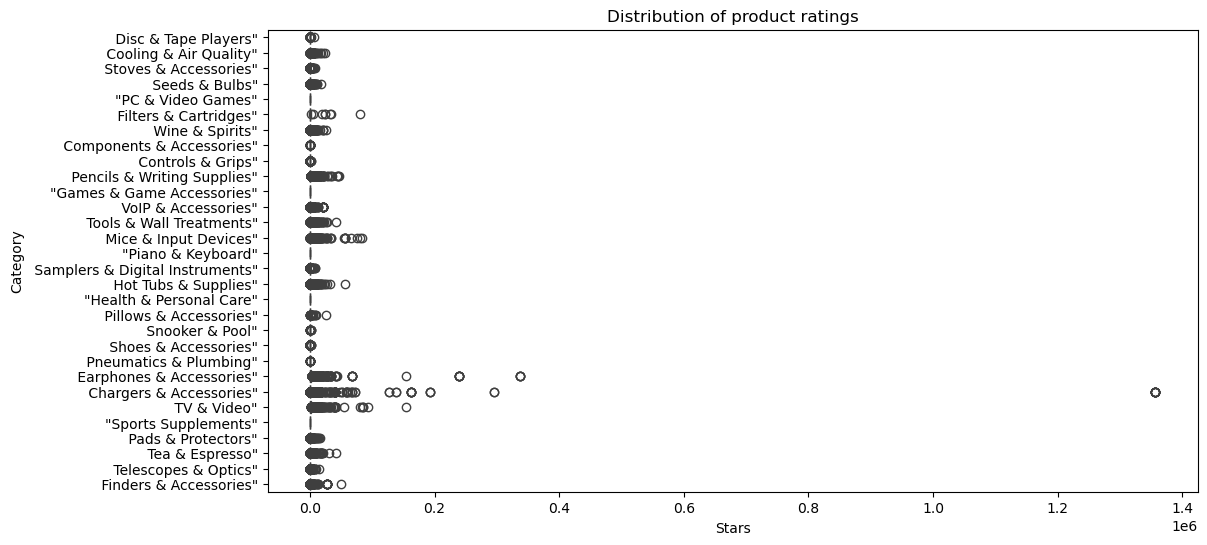

In [17]:
### Part 2: Exploring Product Prices and Ratings Across Categories and Brands
#**Objective**: Investigate how different product categories influence product prices.

#0. **Preliminary Step: Remove outliers in product prices.**
#For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or 
#above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. 
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

outlier_low = Q1 - 1.5 * IQR
outlier_high = Q3 + 1.5 * IQR

#The next steps will be done with the dataframe without outliers.
#*Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.*
no_outlier_df = df[
   (df['Price'] >= outlier_low) & 
    (df['Price'] <= outlier_high)].dropna(subset=['Price'])

#1. **Violin Plots**:
 #   - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
 #   - Which product category tends to have the highest median price? Don't filter here by top categories.
sns.violinplot(data=df, x='Price', y='Category', palette="coolwarm", hue='Category', legend=False);
#2. **Bar Charts**:
 #   - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
 #   - Which product category commands the highest average price? Don't filter here by top categories.
top_10_names = no_outlier_df['Category'].value_counts().nlargest(10).index
top_10_avg_price = no_outlier_df[no_outlier_df['Category'].isin(top_10_names)] \
            

top_10_avg_price.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Average Price of Top 10 Most Frequent Categories')
plt.ylabel('Average Price')
plt.show()

#3. **Box Plots**:
 #   - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. 
#Filter out the top 10 categories based on count for better visualization.
 #   - Which category tends to receive the highest median rating from customers? Don't filter here by top categories. 
#Charger and Accessories, Earphone and Accessories, TV& Video 
plt.figure(figsize=(12, 6))
sns.boxplot(x='Stars', y='Category', data=no_outlier_df)
plt.title('Distribution of product ratings')
plt.show()

In [15]:
### Part 3: Investigating the Interplay Between Product Prices and Ratings
#**Objective**: Analyze how product ratings (`stars`) correlate with product prices.

#1. **Correlation Coefficients**:
 #   - Calculate the correlation coefficient between `price` and `stars`.
 #   - Is there a significant correlation between product price and its rating? # no linear/monotonic correlation
correlation = df['Price'].corr(df['Stars'])
correlation

	
#2. **Visualizations**:
 #   - Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
#sns.scatterplot(data=df, x='Price', y='Stars');
 #   - Use a correlation heatmap to visualize correlations between all numerical variables.
potential_categorical_from_numerical = df.select_dtypes("number").loc[:, df.select_dtypes("number").nunique() < 20]
potential_categorical_from_numerical
df_numerical = df.select_dtypes("number").drop(columns=potential_categorical_from_numerical.columns)
correlation_matrix = df_numerical.corr()
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

# Examine if product prices typically follow a normal distribution using a QQ plot. 
#Heavy tails and not ideally distributed 
import statsmodels.api as sm
sm.qqplot(df['Price'], line='s');
